In [1]:
import my_google_calendar
import pandas
from datetime import datetime
date_min = datetime(2013, 3, 1).isoformat() + 'Z' # 'Z' indicates UTC time
date_max = datetime.utcnow().isoformat() + 'Z' # 'Z' indicates UTC time
my_calendar = my_google_calendar.GoogleCalendar('yourCalenderName',date_min,date_max)

events = my_calendar.events_df


loading events into dataframe
100 events processed
200 events processed
300 events processed
400 events processed
500 events processed
600 events processed
700 events processed
800 events processed
900 events processed
1000 events processed
1100 events processed
1200 events processed
1300 events processed
1400 events processed
1500 events processed
1600 events processed
1700 events processed
1800 events processed


In [2]:
meeting_counts_by_date = events[:-120].groupby("startDate")["startDate"].count()
smooth_meeting_counts_by_date = meeting_counts_by_date.rolling(window=7).mean()

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', label='My Label')
reds_line = mlines.Line2D([], [], color='reds', label='My Othes')

#default plot params
params = {'legend.fontsize': 'large',
          'figure.figsize': (50, 35),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.facecolor':'white'}
plt.rcParams.update(params)

def plot_meeting_counts(raw_counts, raw_counts_color, smooth_counts, smooth_counts_color):
    color_look_up= {
        "red":"r",
        "blue":"b",
        "black": "k"
    }
    raw_counts.plot(
                    rot=90, 
                    color= color_look_up[raw_counts_color], 
                    label = 'raw counts'
                   )
    smooth_counts.plot( 
                        rot=90, 
                        color= color_look_up[smooth_counts_color],
                        label= '7 week average',
                        linewidth=3.0
                      )
    raw_counts_line = mlines.Line2D([], [], color='blue', label='1 day count')
    smooth_counts_line = mlines.Line2D([], [], color='red', label='7 day average')

    plt.legend(handles=[raw_counts_line, smooth_counts_line])
    plt.xlabel('Meeting Date')
    plt.ylabel('# Meetings')
    plt.grid(True)
    plt.show()

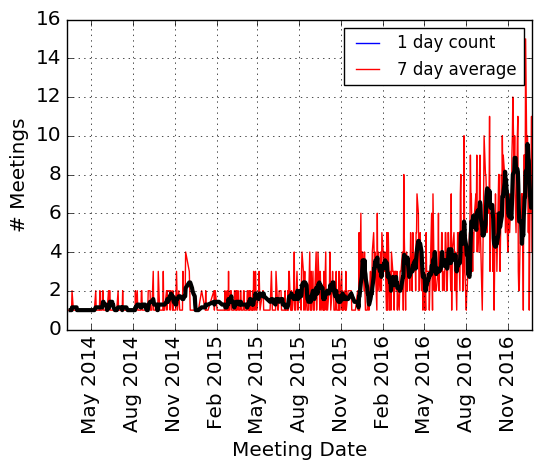

In [5]:
%matplotlib inline
plot_meeting_counts(meeting_counts_by_date, 'red',smooth_meeting_counts_by_date, 'black') 
